In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from MODULES.vae_model import *
from MODULES.utilities_ml import process_one_epoch
from MODULES.utilities_visualization import show_batch
import torch.nn.functional as F
from MODULES.utilities_ml import ConditionalRandomCrop, SpecialDataSet, process_one_epoch


# Check versions
from platform import python_version
print("python_version() ---> ", python_version())
print("torch.__version__ --> ", torch.__version__)

python_version() --->  3.8.2
torch.__version__ -->  1.6.0


In [6]:
params = load_json_as_dict("./ML_parameters.json")
preprocessed = load_obj("./data_train.pt")
img_torch = preprocessed.img.float()
roi_mask_torch = preprocessed.roi_mask.bool()
assert len(img_torch.shape) == len(roi_mask_torch.shape) == 4
# print("GPU GB after opening data ->",torch.cuda.memory_allocated()/1E9)

BATCH_SIZE = params["simulation"]["batch_size"]
SIZE_CROPS = params["input_image"]["size_raw_image"]
N_TEST = params["simulation"]["N_test"]
N_TRAIN = params["simulation"]["N_train"]
conditional_crop_test = ConditionalRandomCrop(desired_w=SIZE_CROPS, desired_h=SIZE_CROPS, 
                                              min_roi_fraction=0.9, n_crops_per_image=N_TEST)

conditional_crop_train = ConditionalRandomCrop(desired_w=SIZE_CROPS, desired_h=SIZE_CROPS, 
                                               min_roi_fraction=0.9, n_crops_per_image=N_TRAIN)

test_data = conditional_crop_test.crop(img=img_torch,
                                       roi_mask=roi_mask_torch)
# print("GPU GB after defining test data ->",torch.cuda.memory_allocated()/1E9)


test_loader = SpecialDataSet(img=test_data,
                             store_in_cuda=False,
                             shuffle=False,
                             drop_last=False,
                             batch_size=BATCH_SIZE)
test_batch_example_fig = test_loader.check_batch()

train_loader = SpecialDataSet(img=img_torch,
                              roi_mask=roi_mask_torch,
                              data_augmentation=conditional_crop_train,
                              store_in_cuda=False,
                              shuffle=True,
                              drop_last=True,
                              batch_size=BATCH_SIZE)
train_batch_example_fig = train_loader.check_batch()

Dataset lenght: 64
img.shape torch.Size([64, 1, 80, 80])
img.dtype torch.float32
img.device cpu
MINIBATCH: img.shapes labels.shape, index.shape -> torch.Size([8, 1, 80, 80]) torch.Size([8]) torch.Size([8])
MINIBATCH: min and max of minibatch tensor(0.0302) tensor(0.7095)
Dataset lenght: 512
img.shape torch.Size([512, 1, 2688, 2688])
img.dtype torch.float32
img.device cpu
MINIBATCH: img.shapes labels.shape, index.shape -> torch.Size([8, 1, 80, 80]) torch.Size([8]) torch.Size([8])
MINIBATCH: min and max of minibatch tensor(0.0302) tensor(0.7267)


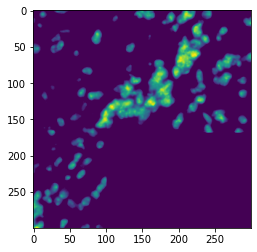

In [15]:
img_to_segment = train_loader.img[0, :, 1060:1360, 2100:2400]
plt.imshow(img_to_segment[0])

1080


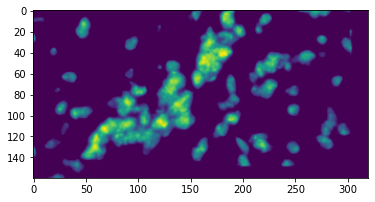

In [25]:
ix = 1240-160
iy= 2140
print(ix)
img_to_segment = train_loader.img[0, :, ix:ix+2*(80), iy:iy+4*(80)]
plt.imshow(img_to_segment[0])

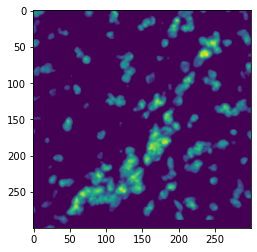

In [21]:

img_to_segment = train_loader.img[0, :, 940:1240, 2140:2440]
plt.imshow(img_to_segment[0])

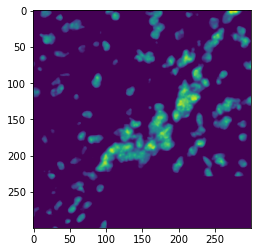

In [ ]:
Entropy(\pi)

In [4]:
# params

In [5]:
image_size = params['input_image']['size_raw_image']
b, c, w, h = 8, params['input_image']['ch_in'], image_size, image_size
imgs_in = torch.sigmoid(torch.randn(b,c,w, h))

optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])

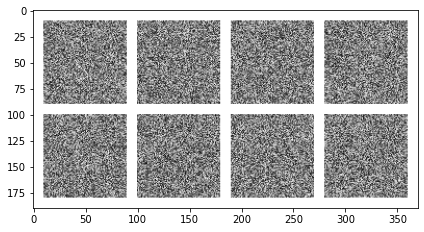

In [6]:
show_batch(imgs_in)

In [7]:
#from MODULES.utilities_ml import SpecialDataSet
#
#train_loader = SpecialDataSet(img=imgs_in,
#                              store_in_cuda=False,
#                              shuffle=True,
#                              drop_last=True,
#                              batch_size=2)
#optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])
#epoch_restart = -1
#history_dict = {}
#min_test_loss = 99999999
#    
#for delta_epoch in range(1, 5):
#    epoch = delta_epoch+epoch_restart
#    with torch.autograd.set_detect_anomaly(True):
#        train_metrics = process_one_epoch(model=vae, 
#                                          dataloader=train_loader, 
#                                          optimizer=optimizer, 
#                                          verbose=True)
#        print(train_metrics.pretty_print(epoch))

In [8]:
params = load_json_as_dict("./ML_parameters.json")
vae = CompositionalVae(params)
generated = vae.generate(imgs_in, draw_boxes=True)

AttributeError: 'Inference' object has no attribute 'big_mask_NON_interacting'

In [ ]:
vae.inference_and_generator.similarity_kernel_dpp.get_l_w()

In [ ]:
print(generated._fields)
print(generated.inference._fields)
print(generated.inference.sample_c_map.shape)
show_batch(generated.inference.sample_c_map.float())

In [ ]:
#generated.inference.prob_map[0,0]

In [ ]:
show_batch(generated.inference.prob_map)

In [ ]:
from MODULES.utilities_visualization import plot_reconstruction_and_inference, plot_segmentation

plot_reconstruction_and_inference(generated, epoch=0, prefix="gen_")

In [ ]:
vae.prob_corr_factor = 0.0
output = vae.forward(imgs_in, draw_image=True, draw_boxes=True, verbose=False)

In [ ]:
print(torch.max(output.inference.prob_map))
show_batch(output.inference.prob_map)

In [ ]:
c_map_2 = (torch.rand_like(output.inference.prob_map) < output.inference.prob_map).float()
show_batch(c_map_2)

In [ ]:
show_batch(output.inference.sample_c_map)

In [ ]:
show_batch(output.inference.sample_c_map)

In [ ]:
print(output.inference.bb_few.bh[..., 0])
print(vae.inference_and_generator.size_min)
print(vae.inference_and_generator.size_max)

In [ ]:
plot_reconstruction_and_inference(output, epoch=0, prefix="rec_")

In [ ]:
vae